# Images et matrices

Quelques manipulations d'images avec deux modules [Pillow](https://pillow.readthedocs.io/en/5.1.x/) et [scikit-image](http://scikit-image.org/). Le premier module implémente les entrées sorties et quelques effet spéciaux, le second est pratique quand il faut travailler numériquement avec les images.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## PIL : operations simples

### Open

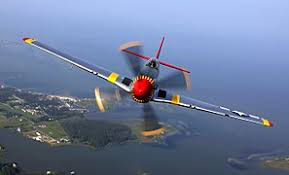

In [2]:
from PIL import Image
img = Image.open("images1.jpg")
img

In [3]:
img.size

(289, 175)

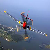

In [4]:
img.resize((50, 50))

### Combiner

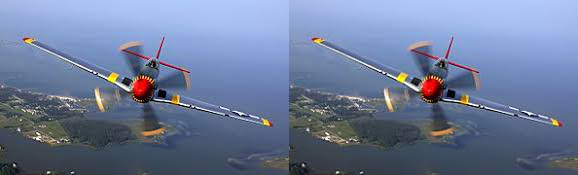

In [5]:
new_img = Image.new('RGB', (img.size[0]*2, img.size[1]))
new_img.paste(img, (0,0))
new_img.paste(img, (img.size[0],0))
new_img

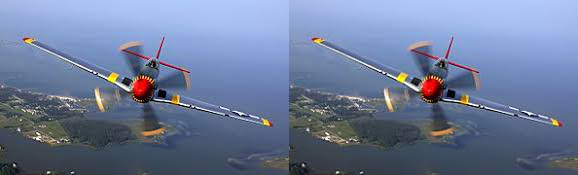

In [6]:
def combine(*imgs, mode='RGB', vert=False):
    if vert:
        sizesx = [im.size[0] for im in imgs]
        sizesy = [im.size[1] for im in imgs]
        new_img = Image.new(mode, (max(sizesx), sum(sizesy)))
        y = 0
        for im in imgs:
            new_img.paste(im, (0, y))
            y += im.size[1]
    else:
        sizesx = [im.size[0] for im in imgs]
        sizesy = [im.size[1] for im in imgs]
        new_img = Image.new(mode, (sum(sizesx), max(sizesy)))
        x = 0
        for im in imgs:
            new_img.paste(im, (x, 0))
            x += im.size[0]
    return new_img

combine(img, img)

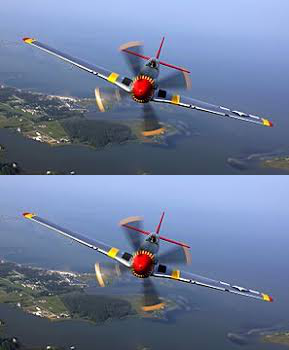

In [7]:
combine(img, img, vert=True)

## PIL to array

Une image en couleur contient trois images, une pour chaque couleur primaire.

In [8]:
import numpy
array = numpy.array(img.getdata(), dtype=numpy.uint8).reshape(img.size[1], img.size[0], 3)
array.shape

(175, 289, 3)

In [9]:
array.dtype

dtype('uint8')

## D'une matrice à sa transposée

In [10]:
array.transpose((2, 1, 0)).shape

(3, 289, 175)

## Matrice à PIL

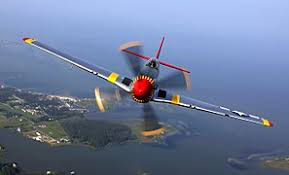

In [11]:
from PIL import Image
img2 = Image.fromarray(array)
img2

## Séparer les couleurs

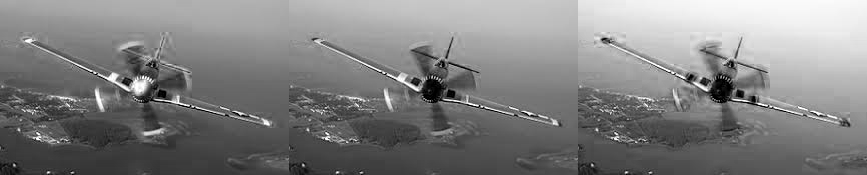

In [12]:
im_r, im_b, im_g = img.split()
combine(im_r, im_b, im_g, mode="L")

### YCbCr

In [13]:
img_ycbcr = img.convert('YCbCr')
img_ycbcr.size

(289, 175)

In [14]:
img_y, img_cb, img_cr = img_ycbcr.split()
img_y.size

(289, 175)

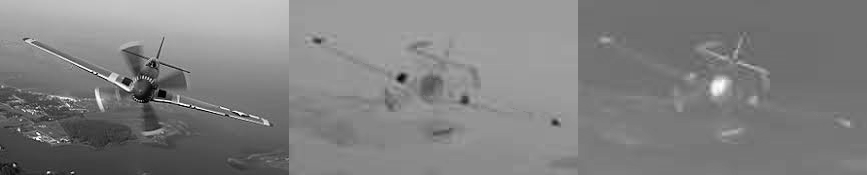

In [15]:
combine(img_y, img_cb, img_cr, mode="L")